<a href="https://colab.research.google.com/github/hempelc/kaust_bioinfo_workshop/blob/main/metabarcoding_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KAUST bioinformatics workshop - processing and analyzing an OTU table in R

<u>**IMPORTANT!**</u> This tutorial requires the OTU table we generated with Apscale. The instance of Google Colab you're running right now has a space for files, which you can find on the left side (folder icon). Click on the icon and drag and drop the OTU table in the "Files" space. Now, the file is accessible on your Google Colab instance.

Install and load libraries:

In [ ]:
install.packages("BiocManager")
BiocManager::install("phyloseq")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("plotly")
install.packages("zCompositions")
install.packages("remotes")
remotes::install_github("vmikk/metagMisc")
install.packages("data.table")
BiocManager::install("microbiome")
install.packages("htmlwidgets")
install.packages("iNEXT")
remotes::install_github("david-barnett/microViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'BiocVersion', 'phyloseq'

also installing the dependencies ‘bitops’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘pixmap’, ‘sp’, ‘Rcpp’, ‘RcppArmadillo’, ‘rhdf5’, ‘S4Vectors’, ‘IRanges’, ‘XVector’, ‘GenomeInfoDb’, ‘iterators’, ‘permute’, ‘ade4’, ‘ape’, ‘Biobase’, ‘BiocGenerics’, ‘biomformat’, ‘Biostrings’, ‘foreach’, ‘igraph’, ‘multtest’, ‘plyr’, ‘reshape2’, ‘vegan’


Old packages: 'bit', 'curl', 'DBI', 'devtools', 'digest', 'gargle', 'glue',
  'highr', 'isoband', 'openssl', 'pkgload', 'ps', 'ragg', 'readr', 'reprex',
  'rlang', 'roxygen2', 'textshaping', 'timechange', 'uuid', 'whisker', 'withr',
 


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpqoqUml/remotes67d2786b902/vmikk-metagMisc-5e9c680/DESCRIPTION’ ... OK
* preparing ‘metagMisc’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘metagMisc_0.5.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'microbiome'

also installing the dependencies ‘DEoptimR’, ‘tensorA’, ‘robustbase’, ‘bayesm’, ‘compositions’, ‘Rtsne’


Old packages: 'bit', 'curl', 'DBI', 'devtools', 'digest', 'gargle', 'glue',
  'highr', 'isoband', 'openssl', 'pkgload', 'ps', 'ragg', 'readr', 'reprex',
  'rlang', 'roxygen2', 'textshaping', 'timechange', 'uuid', 'whisker', 'withr',
  'boot', 'MASS', 'Matrix', 'nlme'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspeci

rlang        (1.1.2  -> 1.1.3  ) [CRAN]
glue         (1.6.2  -> 1.7.0  ) [CRAN]
withr        (2.5.2  -> 3.0.0  ) [CRAN]
isoband      (0.2.6  -> 0.2.7  ) [CRAN]
GlobalOpt... (NA     -> 0.1.2  ) [CRAN]
rjson        (NA     -> 0.2.21 ) [CRAN]
shape        (NA     -> 1.4.6  ) [CRAN]
digest       (0.6.33 -> 0.6.34 ) [CRAN]
highr        (0.9    -> 0.10   ) [CRAN]
TSP          (NA     -> 1.2-4  ) [CRAN]
registry     (NA     -> 0.5-1  ) [CRAN]
qap          (NA     -> 0.1-2  ) [CRAN]
gclus        (NA     -> 1.3.2  ) [CRAN]
ca           (NA     -> 0.71.1 ) [CRAN]
doParallel   (NA     -> 1.0.17 ) [CRAN]
matrixStats  (NA     -> 1.2.0  ) [CRAN]
png          (NA     -> 0.1-8  ) [CRAN]
clue         (NA     -> 0.3-65 ) [CRAN]
GetoptLong   (NA     -> 1.0.5  ) [CRAN]
circlize     (NA     -> 0.4.15 ) [CRAN]
sourcetools  (NA     -> 0.1.7-1) [CRAN]
xtable       (NA     -> 1.8-4  ) [CRAN]
httpuv       (NA     -> 1.6.13 ) [CRAN]
uuid         (1.1-1  -> 1.2-0  ) [CRAN]
cowplot      (NA     -> 1.1.2  ) [CRAN]


Installing 29 packages: rlang, glue, withr, isoband, GlobalOptions, rjson, shape, digest, highr, TSP, registry, qap, gclus, ca, doParallel, matrixStats, png, clue, GetoptLong, circlize, sourcetools, xtable, httpuv, uuid, cowplot, seriation, ComplexHeatmap, shiny, ggiraph

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpqoqUml/remotes67d12e109fc/david-barnett-microViz-90f913b/DESCRIPTION’ ... OK
* preparing ‘microViz’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘microViz/vignettes’
* building ‘microViz_0.12.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(plyr)
library(dplyr)
library(tidyverse)
library(plotly)
library(vegan)
library(zCompositions)
library(phyloseq)
library(metagMisc)
library(data.table)
library(microbiome)
library(htmlwidgets)
library(iNEXT)
library(microViz)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.4     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::desc()      masks plyr::desc()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr

Define two helpful functions that I found online:

In [ ]:
# I don't even know what this function does exactly but it works well with the example code
fast_melt = function(physeq,
                     includeSampleVars = character(),
                     omitZero = FALSE){
  require("phyloseq")
  require("data.table")
  # supports "naked" otu_table as `physeq` input.
  otutab = as(otu_table(physeq), "matrix")
  if(!taxa_are_rows(physeq)){otutab <- t(otutab)}
  otudt = data.table(otutab, keep.rownames = TRUE)
  setnames(otudt, "rn", "TaxaID")
  # Enforce character TaxaID key
  otudt[, TaxaIDchar := as.character(TaxaID)]
  otudt[, TaxaID := NULL]
  setnames(otudt, "TaxaIDchar", "TaxaID")
  # Melt count table
  mdt = melt.data.table(otudt,
                        id.vars = "TaxaID",
                        variable.name = "SampleID",
                        value.name = "count")
  if(omitZero){
    # Omit zeroes and negative numbers
    mdt <- mdt[count > 0]
  }
  # Omit NAs
  mdt <- mdt[!is.na(count)]
  # Calculate relative abundance
  mdt[, RelativeAbundance := count / sum(count), by = SampleID]
  if(!is.null(tax_table(physeq, errorIfNULL = FALSE))){
    # If there is a tax_table, join with it. Otherwise, skip this join.
    taxdt = data.table(as(tax_table(physeq, errorIfNULL = TRUE), "matrix"), keep.rownames = TRUE)
    setnames(taxdt, "rn", "TaxaID")
    # Enforce character TaxaID key
    taxdt[, TaxaIDchar := as.character(TaxaID)]
    taxdt[, TaxaID := NULL]
    setnames(taxdt, "TaxaIDchar", "TaxaID")
    # Join with tax table
    setkey(taxdt, "TaxaID")
    setkey(mdt, "TaxaID")
    mdt <- taxdt[mdt]
  }
  wh.svars = which(sample_variables(physeq) %in% includeSampleVars)
  if( length(wh.svars) > 0 ){
    # Only attempt to include sample variables if there is at least one present in object
    sdf = as(sample_data(physeq), "data.frame")[, wh.svars, drop = FALSE]
    sdt = data.table(sdf, keep.rownames = TRUE)
    setnames(sdt, "rn", "SampleID")
    # Join with long table
    setkey(sdt, "SampleID")
    setkey(mdt, "SampleID")
    mdt <- sdt[mdt]
  }
  setkey(mdt, "TaxaID")
  return(mdt)
}

# Remove OTUs from phyloseq object by name
pop_taxa = function(physeq, badTaxa){
  allTaxa = taxa_names(physeq)
  allTaxa <- allTaxa[!(allTaxa %in% badTaxa)]
  return(prune_taxa(allTaxa, physeq))
}

Read in data:

In [ ]:
otu_table_file <- "/content/kaust_bioinformatics_workshop_apscale_OTU_table_filtered_microdecon-filtered_with_taxonomy.csv"
otu_df <- read.csv(otu_table_file, row.names="ID")

Generate directory for plots:

In [ ]:
plot_outdir <- "/content/plots"
dir.create(plot_outdir, showWarnings = FALSE)


Read in a metadata table. Ken's data has only one metadata variable, the fish host species, which we will type in manually and turn into a metadata dataframe, but you can load a metadata table with lots of variables. Important: The row names of the metadata dataframe have to match the column names of the OTU table samples.

In [ ]:
metadata <- data.frame(
   host_species = c("Benthosema pterotum", "Benthosema pterotum", "Benthosema pterotum", "Benthosema pterotum", "Benthosema pterotum", "Vincuguerria mabahiss", "Vincuguerria mabahiss", "Vincuguerria mabahiss", "Vincuguerria mabahiss", "Vincuguerria mabahiss"),
   row.names = c("LF.ST71", "LF.ST72", "LF.ST73", "LF.ST74", "LF.ST75", "LF.ST76", "LF.ST77", "LF.ST78", "LF.ST79", "LF.ST80")
)
metadata

,host_species
,<chr>
LF.ST71,Benthosema pterotum
LF.ST72,Benthosema pterotum
LF.ST73,Benthosema pterotum
LF.ST74,Benthosema pterotum
LF.ST75,Benthosema pterotum
LF.ST76,Vincuguerria mabahiss
LF.ST77,Vincuguerria mabahiss
LF.ST78,Vincuguerria mabahiss
LF.ST79,Vincuguerria mabahiss


Make a phyloseq object. Therefore, we preprocess the df, split it into OTU table and taxonomy table, and set up the separate objects for phyloseq, including a metadata object:

In [ ]:
# Standardize taxonomy for anything not identifiable. NOTE: This is optional!
# I do this to put everything that could not be identified into the same category
# to delete it later, but the data can also be analyzed non-standardized to get
# a finer distinction between non-assigned OTUs
ranks <- c("domain", "phylum", "class", "order", "family", "genus", "species")
otu_df <- otu_df %>%
  mutate_at(vars(ranks), ~replace(., . %in% c("Not available", "Not_available", "Taxonomy unreliable", "No match in database"), NA))

# OTU table: grab all columns starting with LF and turn them into a phyloseq OTU table object
OTU <- otu_table(otu_df[, grepl("^LF", names(otu_df))], taxa_are_rows = TRUE)

# Tax table: has to be a matrix for phyloseq to be happy
TAX <- tax_table(as.matrix(otu_df[, ranks]))

# Metadata: row names have to align with sample names in the OTU table
META <- sample_data(metadata)

# Make the phyloseq object
physeq = phyloseq(OTU, TAX, META)

Inspect the objects:

In [ ]:
physeq
otu_table(physeq)
tax_table(physeq)
sample_data(physeq)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 232 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 1 sample variables ]
tax_table()   Taxonomy Table:    [ 232 taxa by 7 taxonomic ranks ]

,LF.ST71,LF.ST72,LF.ST73,LF.ST74,LF.ST75,LF.ST76,LF.ST77,LF.ST78,LF.ST79,LF.ST80
OTU_1,2477517,47268,88622,144293,558640,0,1660,1834,838,3837
OTU_2,0,0,0,0,0,1155243,148950,294572,78291,42736
OTU_3,7290,1121,411048,90272,179242,633,8956,1782,643,12734
OTU_4,543,430696,2,0,148,0,0,0,0,1
OTU_6,182,249,12789,605,95,50,12340,88,62,69
OTU_7,29,31,12953,129,7268,40,47,94,57,78
OTU_8,0,0,27,26,35,8,28,49,16,15771
OTU_9,287,13,71,41,88,175,669,84,10066,2847
OTU_10,0,0,17,8,19,0,16,17,11221,30
OTU_12,2,0,1687,9225,552,19,27,31,20,23


,domain,phylum,class,order,family,genus,species
OTU_1,Eukaryota,Chordata,Actinopteri,Myctophiformes,Myctophidae,NA,NA
OTU_2,Eukaryota,Chordata,Actinopteri,Stomiiformes,Phosichthyidae,NA,NA
OTU_3,Eukaryota,Chlorophyta,Chloropicophyceae,Chloropicales,Chloropicaceae,Chloropicon,Chloropicon roscoffensis
OTU_4,Eukaryota,Chordata,Actinopteri,Myctophiformes,Myctophidae,Benthosema,NA
OTU_6,Eukaryota,Chlorophyta,Pycnococcaceae,Pycnococcaceae,Pycnococcaceae,Pycnococcus,Pycnococcus provasolii
OTU_7,Eukaryota,Chlorophyta,NA,NA,NA,NA,NA
OTU_8,Eukaryota,Arthropoda,Hexanauplia,Calanoida,NA,NA,NA
OTU_9,Eukaryota,Chordata,Actinopteri,NA,NA,NA,NA
OTU_10,NA,NA,NA,NA,NA,NA,NA
OTU_12,Eukaryota,Dinophyceae,Dinophyceae,NA,NA,NA,NA


,host_species
,<chr>
LF.ST71,Benthosema pterotum
LF.ST72,Benthosema pterotum
LF.ST73,Benthosema pterotum
LF.ST74,Benthosema pterotum
LF.ST75,Benthosema pterotum
LF.ST76,Vincuguerria mabahiss
LF.ST77,Vincuguerria mabahiss
LF.ST78,Vincuguerria mabahiss
LF.ST79,Vincuguerria mabahiss


### **<u>Starting general data exploration. Note: most of the code is taken from https://evomics.org/wp-content/uploads/2016/01/phyloseq-Lab-01-Answers.html</u>**

Generate an information overview of the phyloseq object:

In [ ]:
microbiome::summarize_phyloseq(physeq)

Compositional = NO2

1] Min. number of reads = 1098352] Max. number of reads = 24958793] Total number of reads = 65396514] Average number of reads = 653965.15] Median number of reads = 4133067] Sparsity = 0.4918103448275866] Any OTU sum to 1 or less? NO8] Number of singletons = 09] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)010] Number of sample variables are: 1host_species2



[[1]]
[1] "1] Min. number of reads = 109835"

[[2]]
[1] "2] Max. number of reads = 2495879"

[[3]]
[1] "3] Total number of reads = 6539651"

[[4]]
[1] "4] Average number of reads = 653965.1"

[[5]]
[1] "5] Median number of reads = 413306"

[[6]]
[1] "7] Sparsity = 0.491810344827586"

[[7]]
[1] "6] Any OTU sum to 1 or less? NO"

[[8]]
[1] "8] Number of singletons = 0"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0"

[[10]]
[1] "10] Number of sample variables are: 1"

[[11]]
[1] "host_species"

Determine the lowest level of taxonomic classification and plot it:

  |======================================================================| 100%


Saving 6.67 x 6.67 in image


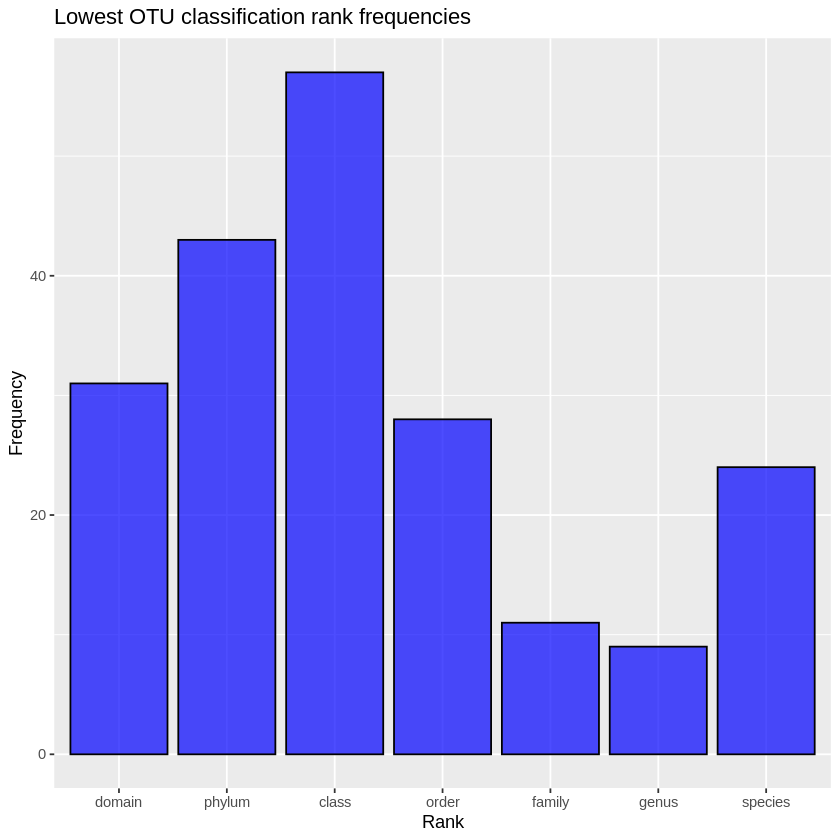

In [ ]:
# Get the lowest levels of classifications
lowest_levels <- get_max_taxonomic_rank(physeq, return_rank_only = TRUE)
# Generate plot
low_tax_plot <- ggplot(as.data.frame(table(lowest_levels)[ranks]), aes(x = lowest_levels, y = Freq)) +
  geom_bar(stat = "identity", fill = "blue", color="black", alpha=0.7) +
  labs(title = "Lowest OTU classification rank frequencies",
       x = "Rank",
       y = "Frequency")
low_tax_plot
ggsave(file.path(plot_outdir, "lowest_otu_classification_rank_frequencies.png"), plot = low_tax_plot)

Tip: also explore your metadata! Plotting metadata variables serves as a sanity check and might reveal biases/missing data etc. Ken's metadata has only one variable so we will plot its distribution:

Saving 6.67 x 6.67 in image


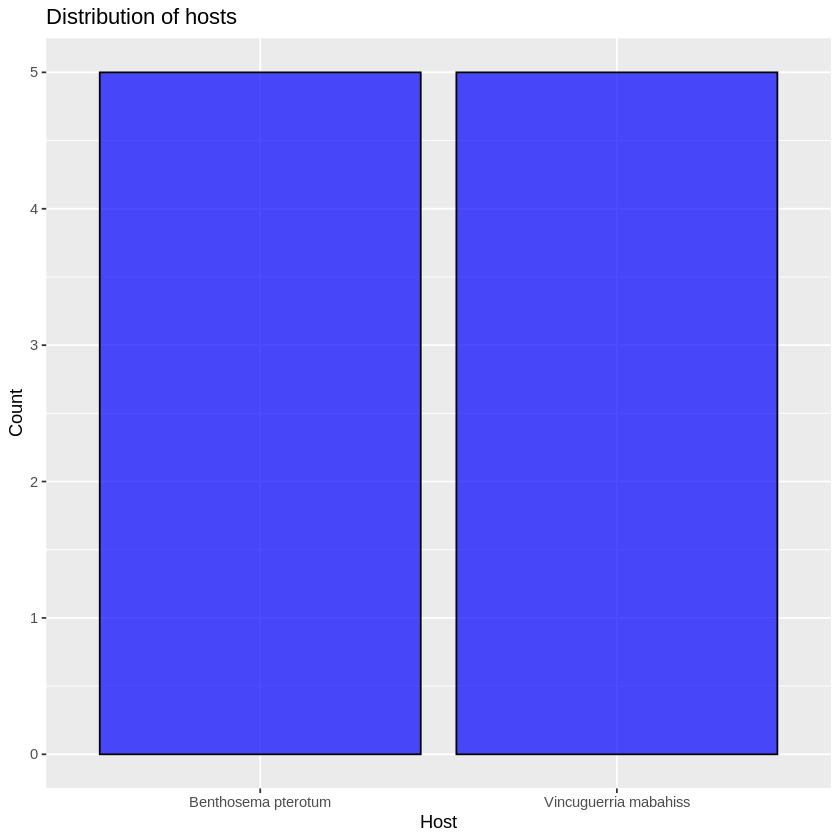

In [ ]:
host_counts <- as.data.frame(table(metadata$"host_species"))
host_counts_plot <- ggplot(host_counts, aes(x = Var1, y = Freq)) +
  geom_bar(stat = "identity", fill = "blue", color="black", alpha=0.7) +
  labs(title = "Distribution of hosts",
       x = "Host",
       y = "Count")
host_counts_plot
ggsave(file.path(plot_outdir, "metadata_distribution_hosts.png"), plot = host_counts_plot)


Determine sequencing depth distribution:

Saving 6.67 x 6.67 in image


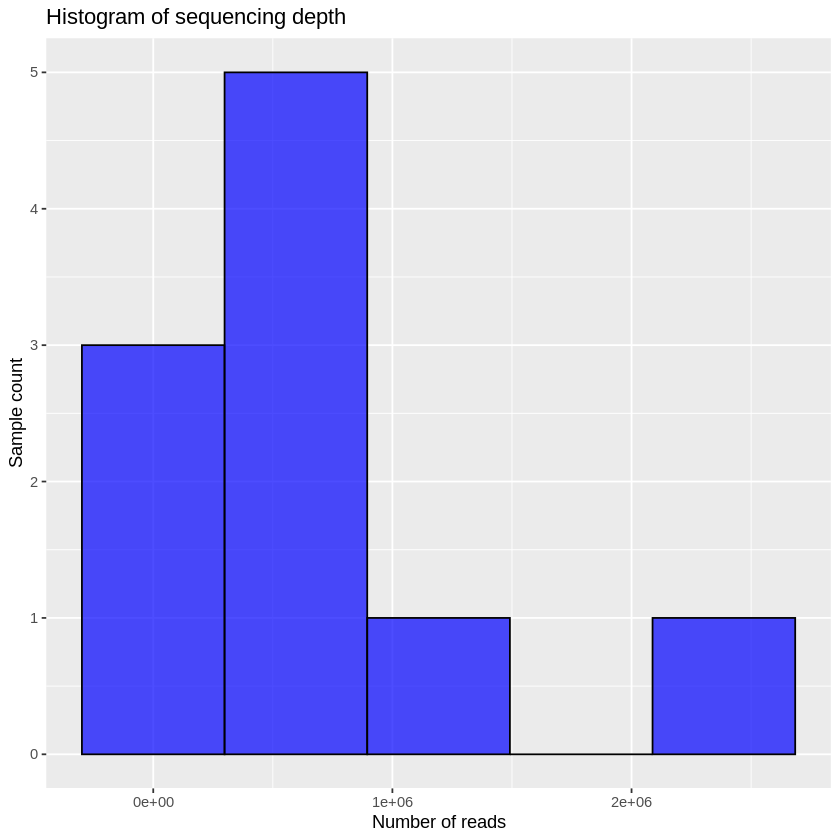

Saving 6.67 x 6.67 in image


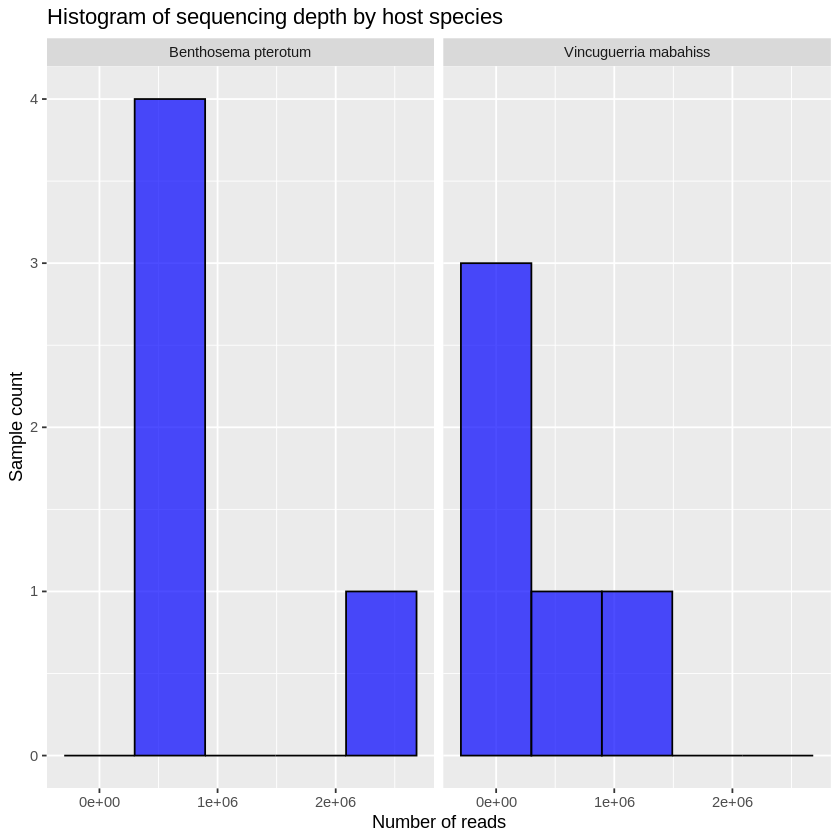

In [ ]:
sdt = data.table(as(sample_data(physeq), "data.frame"),
                 TotalReads = sample_sums(physeq), keep.rownames = TRUE)
setnames(sdt, "rn", "SampleID")
# For all samples
pSeqDepth = ggplot(sdt, aes(TotalReads)) +
  geom_histogram(bins=5, fill = "blue", color="black", alpha=0.7) +
  labs(title = "Histogram of sequencing depth",
       x = "Number of reads",
       y = "Sample count")
pSeqDepth
ggsave(file.path(plot_outdir, "sequencing_depth.png"), plot = pSeqDepth)

# Per host species
pSeqDepth_categories <- pSeqDepth +
  facet_wrap(~host_species) +
  ggtitle("Histogram of sequencing depth by host species")
pSeqDepth_categories
ggsave(file.path(plot_outdir, "sequencing_depth_by_host_species.png"), plot = pSeqDepth_categories)


Plot total OTU total counts:

Warning message in setDT(value):
“Some columns are a multi-column type (such as a matrix column): [1, 2, 3, 4, 5, 6, 7]. setDT will retain these columns as-is but subsequent operations like grouping and joining may fail. Please consider as.data.table() instead which will create a new column for each embedded column.”
Warning message in setDT(ans, key = key):
“Some columns are a multi-column type (such as a matrix column): [1, 2, 3, 4, 5, 6, 7]. setDT will retain these columns as-is but subsequent operations like grouping and joining may fail. Please consider as.data.table() instead which will create a new column for each embedded column.”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 94 rows containing missing values (`geom_bar()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 94 rows containing missing values (`geom_bar()`).”


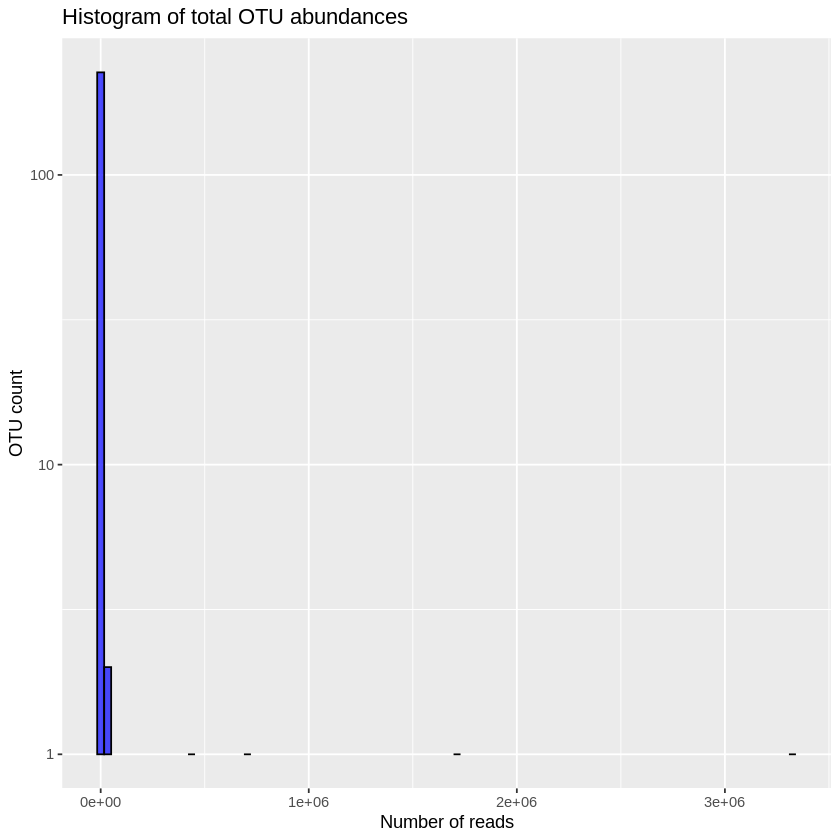

In [ ]:
tdt_tot = data.table(tax_table(physeq),
                     TotalCounts = taxa_sums(physeq),
                     OTU = taxa_names(physeq))
otu_abundances_tot <- ggplot(tdt_tot, aes(TotalCounts)) +
  geom_histogram(bins=100, fill = "blue", color = "black", alpha = 0.7) +
  scale_y_continuous(trans='log10') +
  labs(title = "Histogram of total OTU abundances",
       x = "Number of reads",
       y = "OTU count")
otu_abundances_tot
ggsave(file.path(plot_outdir, "total_otu_abundances_histogram.png"), plot = otu_abundances_tot)

Different format:

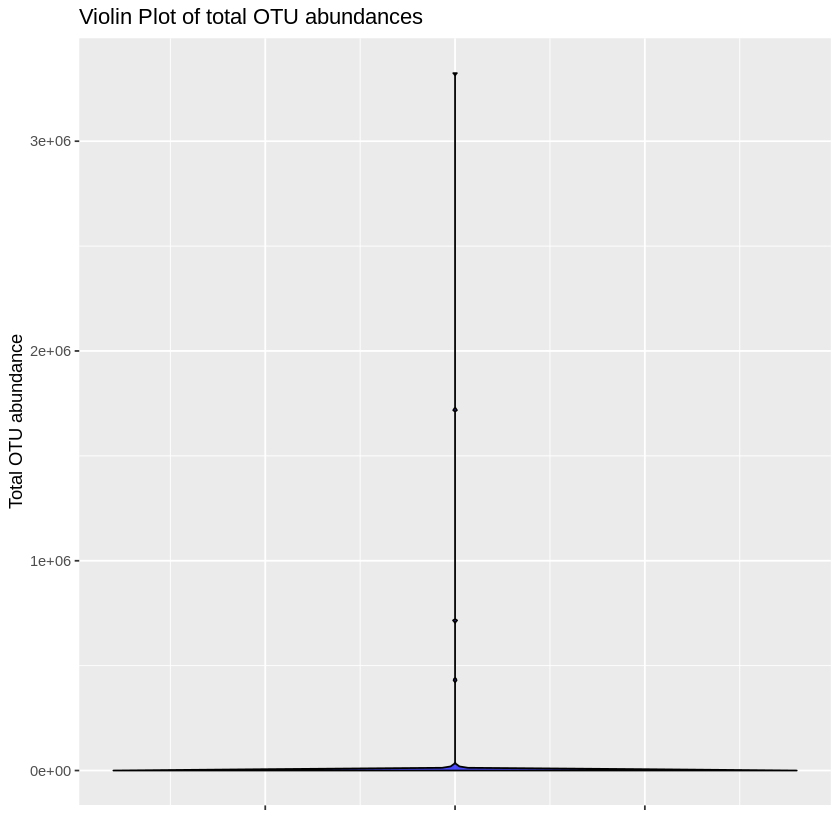

Saving 6.67 x 6.67 in image


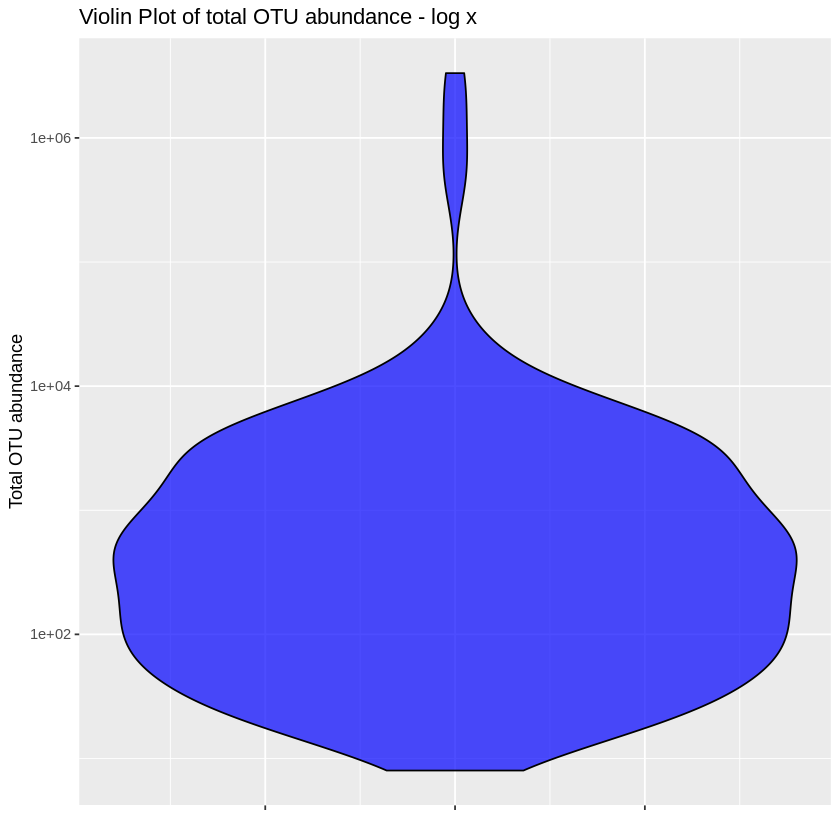

In [ ]:
abundance_violin <- ggplot(tdt_tot, aes(x=1, y = TotalCounts)) +
  geom_violin(fill = "blue", color = "black", alpha = 0.7) +
  xlab("") +
  ylab("Total OTU abundance") +
  theme(axis.text.x = element_blank()) +
  ggtitle("Violin Plot of total OTU abundances")
abundance_violin

abundance_violin_log <- ggplot(tdt_tot, aes(x=1, y = TotalCounts)) +
  geom_violin(fill = "blue", color = "black", alpha = 0.7) +
  xlab("") +
  scale_y_log10() +
  ylab("Total OTU abundance") +
  theme(axis.text.x = element_blank()) +
  ggtitle("Violin Plot of total OTU abundance - log x")
abundance_violin_log

ggsave(file.path(plot_outdir, "total_otu_abundances_violin.png"), plot = abundance_violin_log)

Plot relative OTU counts:

Warning message in setDT(value):
“Some columns are a multi-column type (such as a matrix column): [1, 2, 3, 4, 5, 6, 7]. setDT will retain these columns as-is but subsequent operations like grouping and joining may fail. Please consider as.data.table() instead which will create a new column for each embedded column.”
Warning message in setDT(ans, key = key):
“Some columns are a multi-column type (such as a matrix column): [1, 2, 3, 4, 5, 6, 7]. setDT will retain these columns as-is but subsequent operations like grouping and joining may fail. Please consider as.data.table() instead which will create a new column for each embedded column.”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 94 rows containing missing values (`geom_bar()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 94 rows containing missing values (`geom_bar()`).”


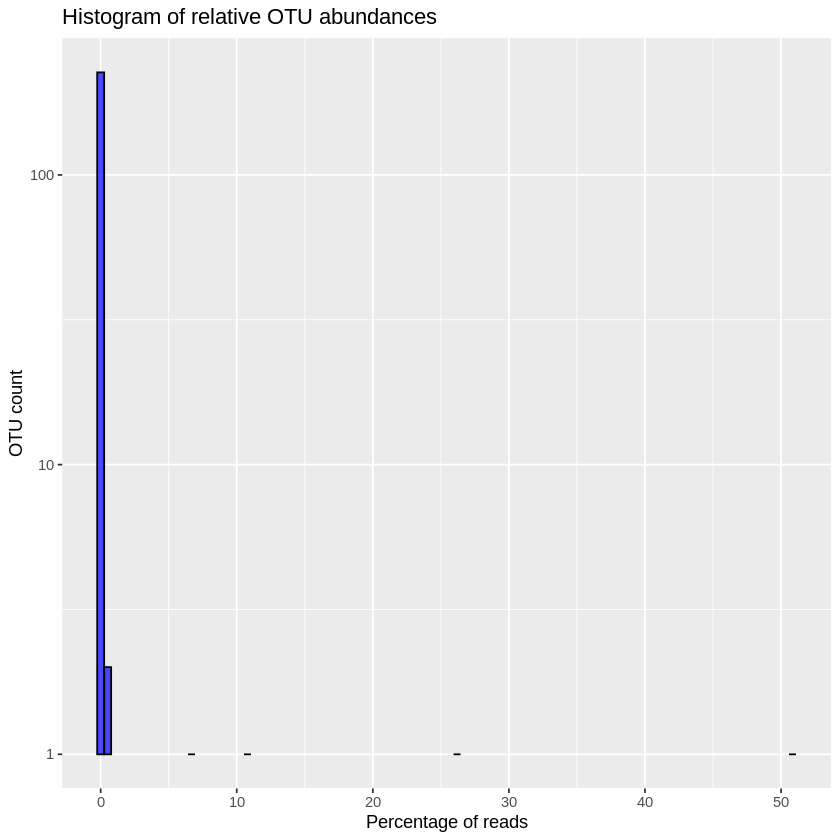

In [ ]:
tdt_rel = data.table(tax_table(physeq),
                     RelCounts = taxa_sums(physeq)/sum(taxa_sums(physeq))*100,
                     OTU = taxa_names(physeq))
otu_abundances_rel <- ggplot(tdt_rel, aes(RelCounts)) +
  geom_histogram(bins=100, fill = "blue", color = "black", alpha = 0.7) +
  scale_y_continuous(trans='log10') +
  labs(title = "Histogram of relative OTU abundances",
       x = "Percentage of reads",
       y = "OTU count")
otu_abundances_rel
ggsave(file.path(plot_outdir, "relative_otu_abundances.png"), plot = otu_abundances_rel)

Get information on the number of empty OTUs (contain 0 reads due to the subtraction of negative controls) or singleton OTUs (contain single read):

In [ ]:
# Number of empty OTUs
cat("Number of empty OTUs:", tdt_tot[(TotalCounts == 0), .N], "\n")
# Number of singletons
cat("Number of singletons:", tdt_tot[(TotalCounts == 1), .N])

Number of empty OTUs: 0 
Number of singletons: 0

Plot cumulative total OTU sum to determine a total count filtering threshold:


Saving 6.67 x 6.67 in image
Warning message:
“Removed 98 rows containing missing values (`geom_point()`).”


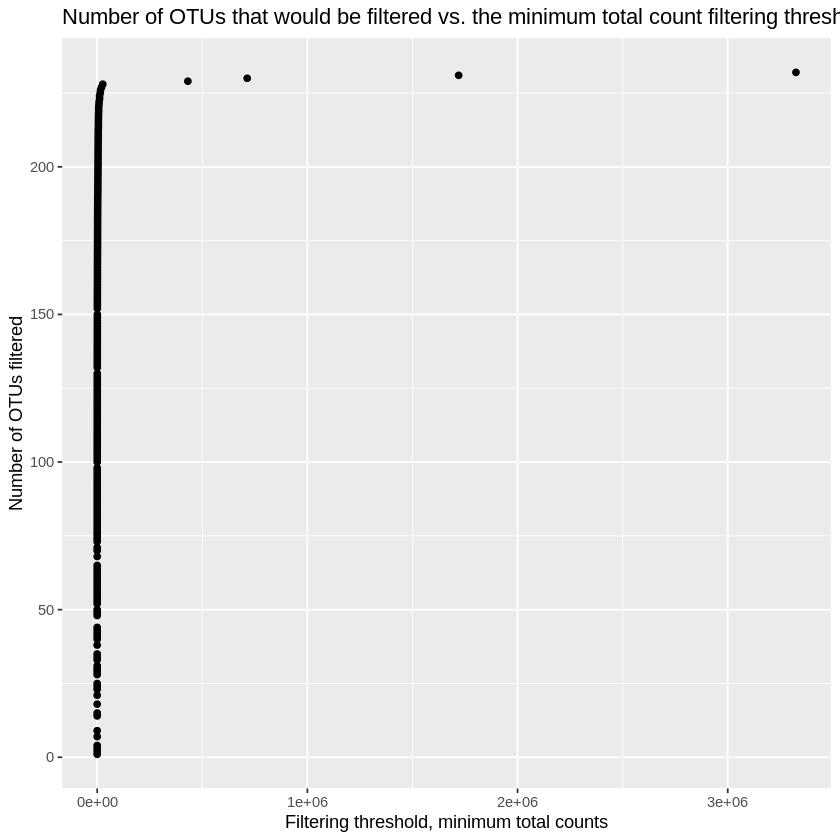

Saving 6.67 x 6.67 in image
Warning message:
“Removed 98 rows containing missing values (`geom_point()`).”


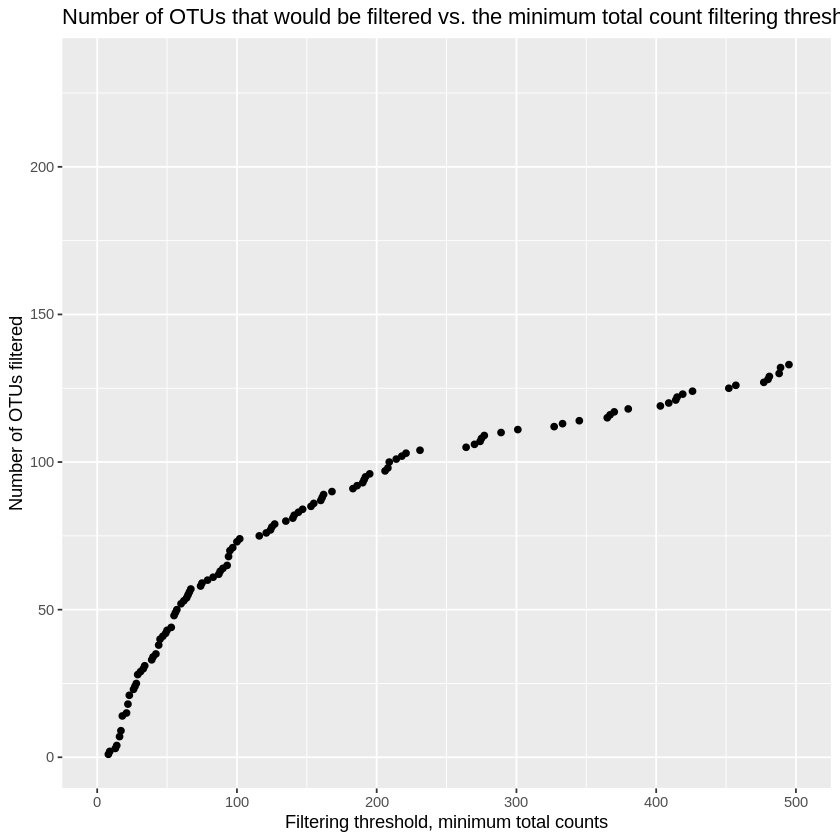

In [ ]:
taxcumsum_tot = tdt_tot[, .N, by = TotalCounts]
setkey(taxcumsum_tot, TotalCounts)
taxcumsum_tot[, CumSum := cumsum(N)]

pCumSum_tot <- ggplot(taxcumsum_tot, aes(TotalCounts, CumSum)) +
  geom_point() +
  xlab("Filtering threshold, minimum total counts") +
  ylab("Number of OTUs filtered") +
  ggtitle("Number of OTUs that would be filtered vs. the minimum total count filtering threshold")
pCumSum_tot
ggsave(file.path(plot_outdir, "total_abundance_filtering_threshold.png"), plot = pCumSum_tot)

pCumSum_tot_bend <- ggplot(taxcumsum_tot, aes(TotalCounts, CumSum)) +
  geom_point() +
  xlab("Filtering threshold, minimum total counts") +
  ylab("Number of OTUs filtered") +
  ggtitle("Number of OTUs that would be filtered vs. the minimum total count filtering threshold") +
  xlim(0, 500) # Zoom in on bend by defining a range for the x axis. Change this to what is appropriate for your data
pCumSum_tot_bend
ggsave(file.path(plot_outdir, "total_abundance_filtering_threshold.png"), plot = pCumSum_tot_bend)

Generate an interactive version of this graph using the library plotly (really cool visualization tool):



In [ ]:
pCumSum_tot_plotly <- plot_ly(
  data = as.data.frame(taxcumsum_tot),
  x = ~TotalCounts,
  y = ~CumSum,
  type = 'scatter',
  mode = 'markers'
) %>%
  layout(
    xaxis = list(title = "Filtering threshold, minimum total counts",
      range = list(0, 500)), # Zoom in on bend by defining a range for the x axis. Change this to what is appropriate for your data
    yaxis = list(title = "Number of OTUs filtered"),
    title = "Number of OTUs that would be filtered vs. the minimum total count filtering threshold"
  )

htmlwidgets::saveWidget(
                widget = pCumSum_tot_plotly,
                file = file.path(plot_outdir, "total_abundance_filtering_threshold_plotly.html"))

Plot cumulative relative OTU sum to determine a relative count filtering threshold:


Saving 6.67 x 6.67 in image
Warning message:
“Removed 133 rows containing missing values (`geom_point()`).”


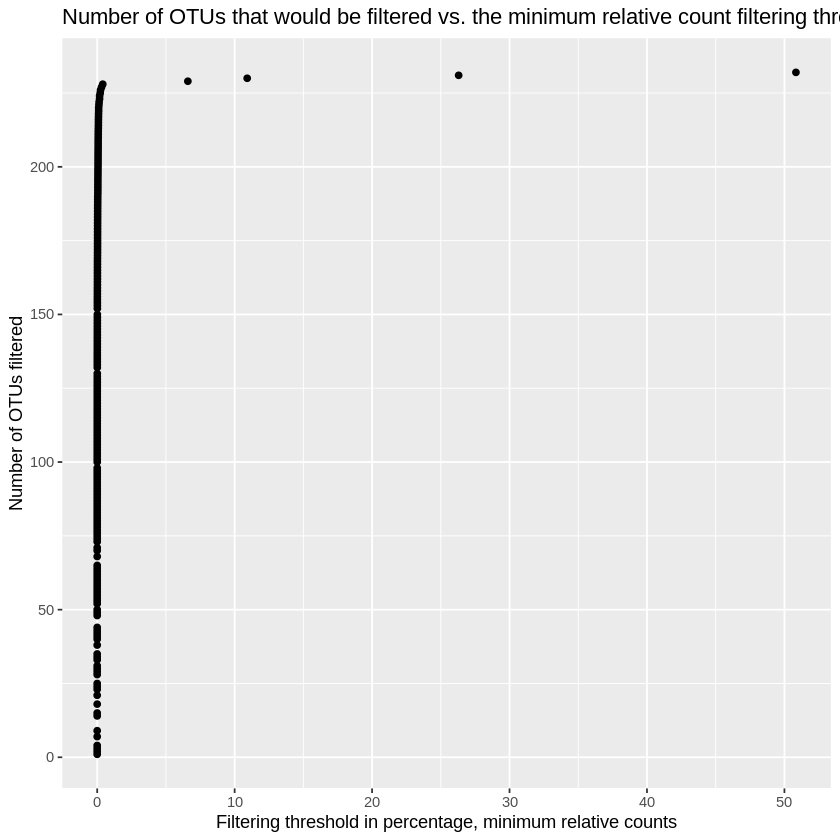

Saving 6.67 x 6.67 in image
Warning message:
“Removed 133 rows containing missing values (`geom_point()`).”


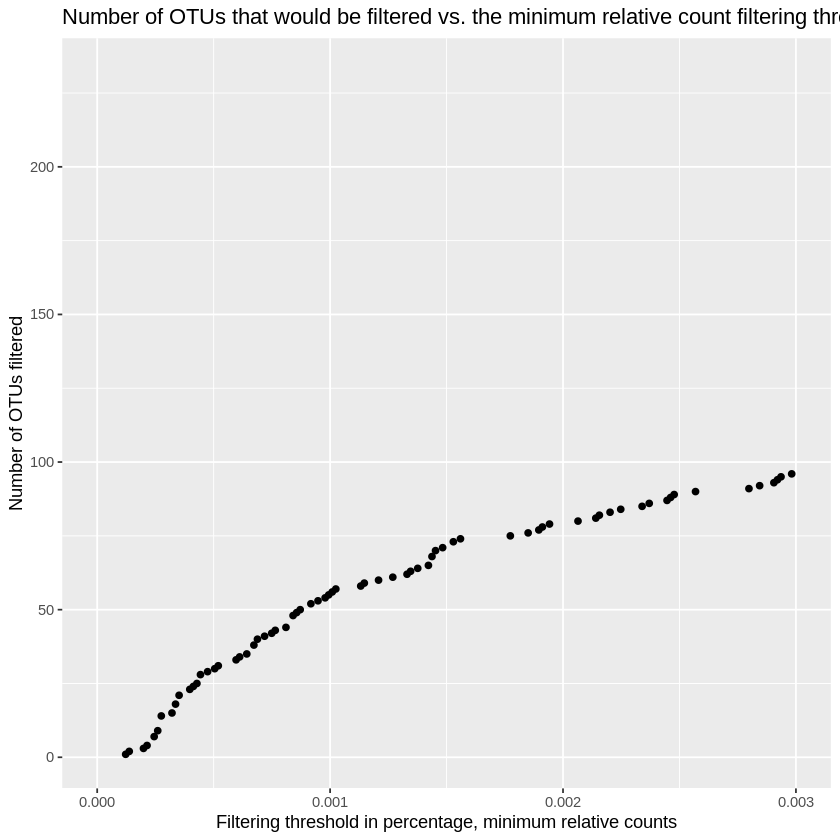

In [ ]:
taxcumsum_rel = tdt_rel[, .N, by = RelCounts]
setkey(taxcumsum_rel, RelCounts)
taxcumsum_rel[, CumSum := cumsum(N)]

pCumSum_rel <- ggplot(taxcumsum_rel, aes(RelCounts, CumSum)) +
  geom_point() +
  xlab("Filtering threshold in percentage, minimum relative counts") +
  ylab("Number of OTUs filtered") +
  ggtitle("Number of OTUs that would be filtered vs. the minimum relative count filtering threshold in percentage")
pCumSum_rel
ggsave(file.path(plot_outdir, "relative_abundance_filtering_threshold.png"), plot = pCumSum_rel)

pCumSum_rel_bend <- ggplot(taxcumsum_rel, aes(RelCounts, CumSum)) +
  geom_point() +
  xlab("Filtering threshold in percentage, minimum relative counts") +
  ylab("Number of OTUs filtered") +
  ggtitle("Number of OTUs that would be filtered vs. the minimum relative count filtering threshold in percentage") +
  xlim(0, 0.003) # Zoom in on bend by defining a range for the x axis. Change this to what is appropriate for your data
pCumSum_rel_bend
ggsave(file.path(plot_outdir, "relative_abundance_filtering_threshold_bend.png"), plot = pCumSum_rel_bend)


Generate an interactive version of this graph:

In [ ]:
pCumSum_rel_plotly <- plot_ly(
  data = as.data.frame(taxcumsum_rel),
  x = ~RelCounts,
  y = ~CumSum,
  type = 'scatter',
  mode = 'markers'
) %>%
  layout(
    xaxis = list(
      title = "Filtering threshold in percentage, minimum relative counts",
      range = list(0, 0.003), # Zoom in on bend by defining a range for the x axis. Change this to what is appropriate for your data
      tickformat = ".4f" # How many 0s after comma on x axis ticks
    ),
    yaxis = list(title = "Number of OTUs filtered"),
    title = "Number of OTUs that would be filtered vs. the minimum relative count filtering threshold in percentage",
    type="log"
  )

htmlwidgets::saveWidget(
                widget = pCumSum_rel_plotly,
                file = file.path(plot_outdir, "relative_abundance_filtering_threshold_plotly.html"))

Warning message:
“'layout' objects don't have these attributes: 'type'
Valid attributes include:
'_deprecated', 'activeshape', 'annotations', 'autosize', 'autotypenumbers', 'calendar', 'clickmode', 'coloraxis', 'colorscale', 'colorway', 'computed', 'datarevision', 'dragmode', 'editrevision', 'editType', 'font', 'geo', 'grid', 'height', 'hidesources', 'hoverdistance', 'hoverlabel', 'hovermode', 'images', 'legend', 'mapbox', 'margin', 'meta', 'metasrc', 'modebar', 'newshape', 'paper_bgcolor', 'plot_bgcolor', 'polar', 'scene', 'selectdirection', 'selectionrevision', 'separators', 'shapes', 'showlegend', 'sliders', 'smith', 'spikedistance', 'template', 'ternary', 'title', 'transition', 'uirevision', 'uniformtext', 'updatemenus', 'width', 'xaxis', 'yaxis', 'barmode', 'bargap', 'mapType'
”


Plot OTU prevalence (= in how many samples each OTU appears):

Saving 6.67 x 6.67 in image


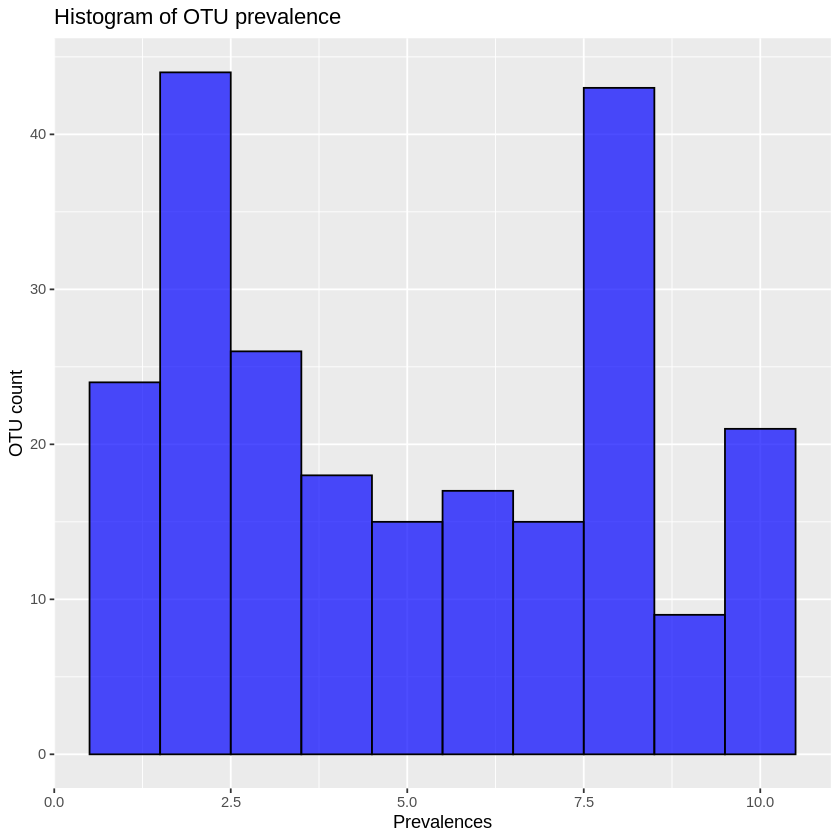

In [ ]:
mdt = fast_melt(physeq)
prevdt = mdt[, list(Prevalence = sum(count > 0),
                    TotalCounts = sum(count)),
             by = TaxaID]
prevhist <- ggplot(prevdt, aes(Prevalence)) +
  geom_histogram(fill = "blue", color = "black", alpha = 0.7, bins=10) + # Change the number of bins to what fits your data best
  labs(title = "Histogram of OTU prevalence",
       x = "Prevalences",
       y = "OTU count")
prevhist
ggsave(file.path(plot_outdir, "otu_prevalence_histogram.png"), plot = prevhist)

Number of taxa appearing in only 1 or 2 samples:

In [ ]:
cat("Number of OTUs in only 1 sample:", prevdt[(Prevalence == 1), .N], "\n")
cat("Number of OTUs in only 2 samples:", prevdt[(Prevalence == 2), .N])

Number of OTUs in only 1 sample: 24 
Number of OTUs in only 2 samples: 44

Plot the cumulative sum of OTU prevalence to determine a prevalence filtering threshold:

Saving 6.67 x 6.67 in image


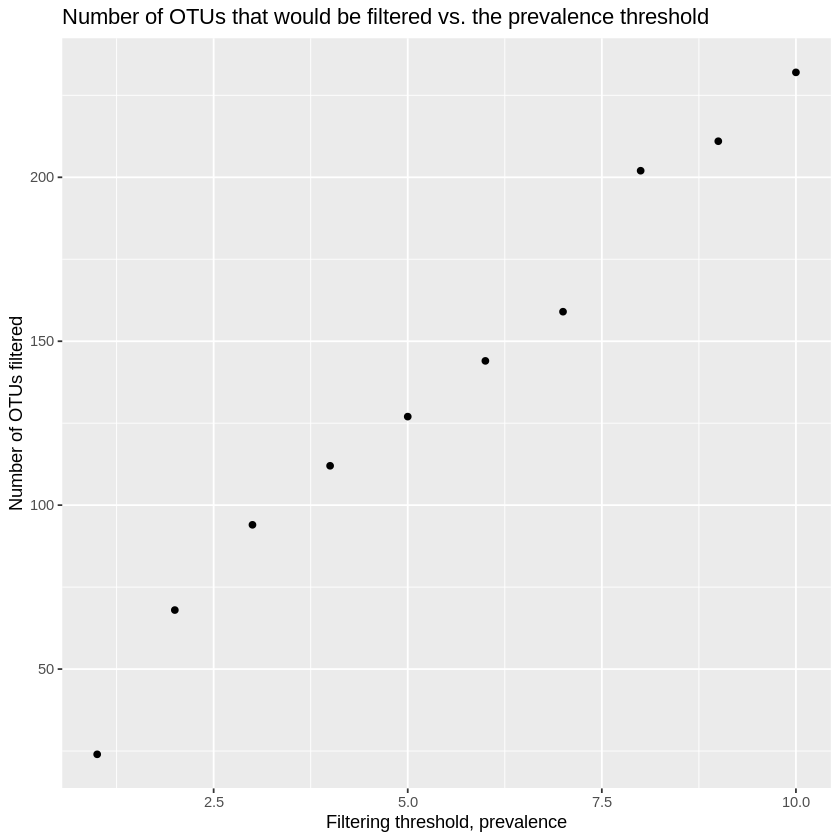

In [ ]:
prevcumsum = prevdt[, .N, by = Prevalence]
setkey(prevcumsum, Prevalence)
prevcumsum[, CumSum := cumsum(N)]

pPrevCumSum_ggplot <- ggplot(prevcumsum, aes(Prevalence, CumSum)) +
  geom_point() +
  xlab("Filtering threshold, prevalence") +
  ylab("Number of OTUs filtered") +
  ggtitle("Number of OTUs that would be filtered vs. the prevalence threshold")
pPrevCumSum_ggplot
ggsave(file.path(plot_outdir, "otu_prevalence_cumulativesum.png"), plot = pPrevCumSum_ggplot)

Prevalence vs. total abundance scatter plot:

Saving 6.67 x 6.67 in image


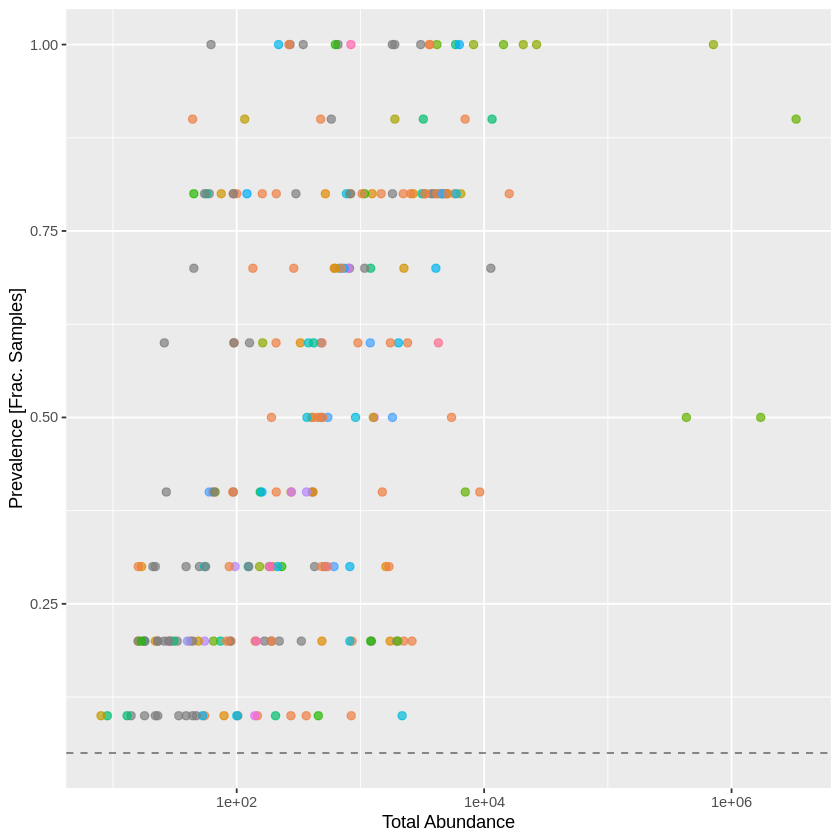

In [ ]:
prev_vs_abundance <- phyloseq_prevalence_plot(
  physeq,
  prev.trh = 0.05, #Add horizontal line with prevalence threshold
  taxcolor = "phylum", #Taxonomy rank for coloring the points
  facet = F,
  point_alpha = 0.7,
  showplot = T
)
ggsave(file.path(plot_outdir, "prevalence_vs_abundance_scatter.png"), plot = prev_vs_abundance)

Alpha diversity across samples and based on host species:

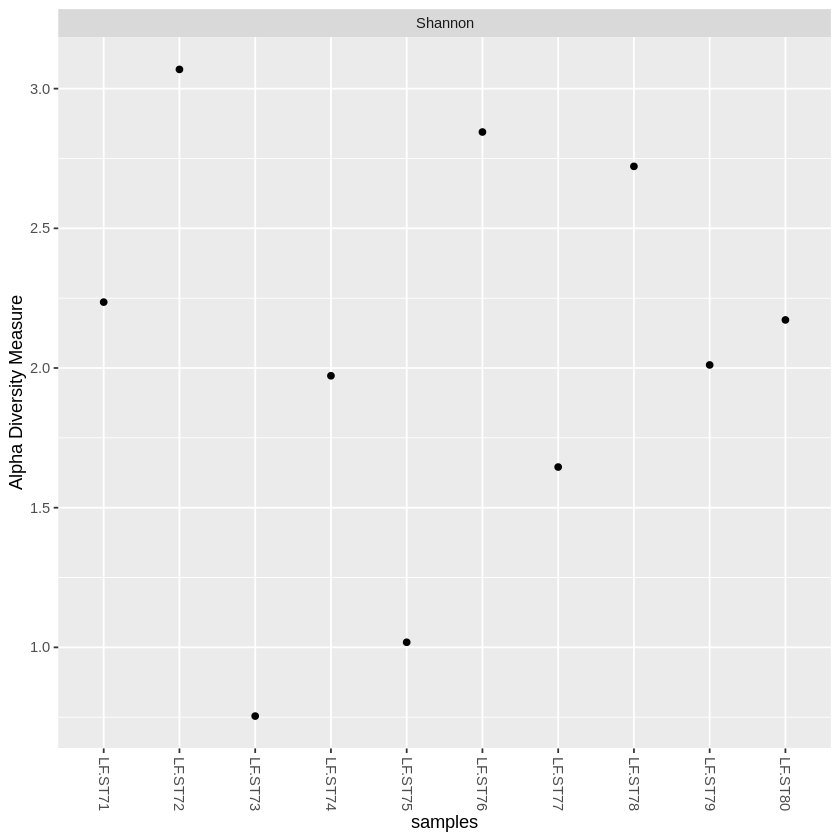

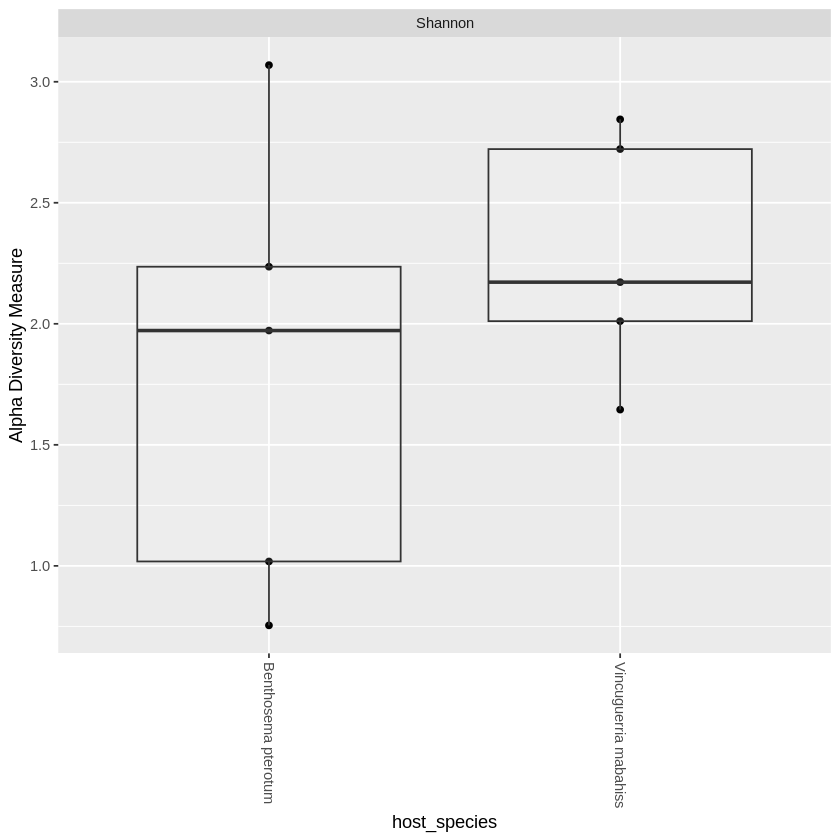

In [ ]:
plot_richness(physeq, measures=c("Shannon"))
p <- plot_richness(physeq, x="host_species", , measures=c("Shannon"))
p + geom_boxplot(data = p$data, aes(x = host_species, y = value, color = NULL), alpha = 0.1)

## <u>**Data processing starts here**</u>

Now that we have an idea of how our data looks, we can process it, for example by using some of the filter tresholds we explored earlier. Note that both the OTU table AND the tax table of the phyloseq object are automatically adapted/changed. This is a major advantage of phyloseq objects:

In [ ]:
# Set threshold for relative abundance based on previously generated graphs and filter
thresh_relabun = 0.0000022
keepTaxa = (taxa_sums(physeq) / sum(taxa_sums(physeq))) > thresh_relabun
physeq = prune_taxa(keepTaxa, physeq)
# Set threshold for prevalence based on previously generated graphs and filter
tresh_prev = 1
physeq <- filter_taxa(physeq, function(x) sum(x > 0) > tresh_prev, prune = T)

We could also filter the phyloseq object based on metadata, for example excluding samples from a specific host species. We're not going to save the result, as we want to explore the impact of both host species, but here's how you would do it:

In [ ]:
ps_filter(physeq, host_species != "Benthosema pterotum")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 168 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 1 sample variables ]
tax_table()   Taxonomy Table:    [ 168 taxa by 7 taxonomic ranks ]

For this specific dataset, the host species OTUs "overshadow" all other OTUs. But we are not interested in the host species OTUs - so we can remove those. By looking at the initial OTU table, we can safely assume that OTUs 1, 2, and 4 are definitely from the host species, so we can remove them. Note: this can also be done manually in the OTU table before reading in the table, for example using Excel.

In [ ]:
otus_to_remove = c("OTU_1", "OTU_2", "OTU_4")
physeq <- pop_taxa(physeq, otus_to_remove)

## **<u>The fun part: data visualization</u>**

Another major advantage of phyloseq is that it is very easy to generate nice visualizations, since the data is highly organized and can be easily modified for graphs. On top of that, there are great R packages that build on top of phyloseq and allow an even easier generation of graphs. One such package is [microViz](https://david-barnett.github.io/microViz/).

For example, check out the documentation of microViz on visualizing compositions:
https://david-barnett.github.io/microViz/articles/web-only/compositions.html

And here is the documentation to generate very nice heatmaps:
https://david-barnett.github.io/microViz/articles/web-only/heatmaps.html

With those documentations (and other material you can find on the internet by Google-ing "phyloseq visualizations"), you are well equipped to explore your data yourself! Below, I will showcase 3 plots/functions that I find really useful.

First, though, we need to edit our tax table slighly to be able to aggregate the taxonomy for plotting, like so:


In [ ]:
physeq <- tax_fix(physeq)
tax_table(physeq)

Here is an example for a nice bar chart:

Saving 6.67 x 6.67 in image


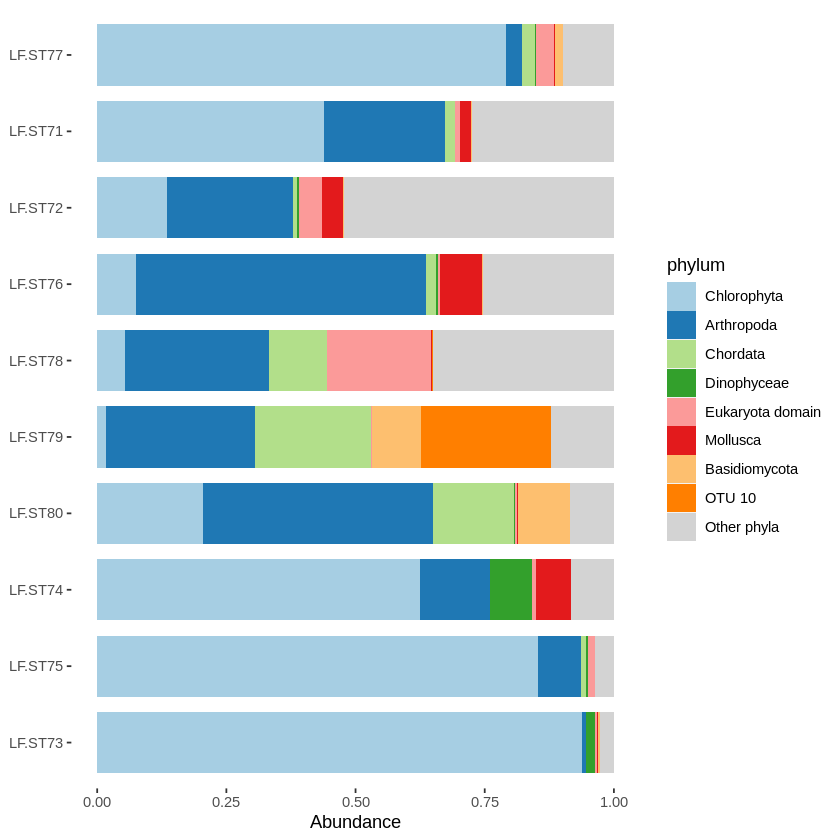

In [ ]:
bar_chart_simple <- physeq %>%
  comp_barplot(
    tax_level = "phylum", # define rank to aggregate on
    n_taxa = 8, # define the number of taxa to give unique colours
    taxon_renamer = function(x) stringr::str_replace_all(x, "_", " "), # remove underscores
    other_name = "Other phyla", # set custom name for the "other" category
    bar_width = 0.8, # reduce the bar width to 70% of one row
    bar_outline_colour = NA # is the default (use NA to remove outlines)
  ) +
  coord_flip()
bar_chart_simple
ggsave(file.path(plot_outdir, "bar_chart_simple.png"), plot = bar_chart_simple)

Different colour scheme and sort by host species:

Saving 6.67 x 6.67 in image


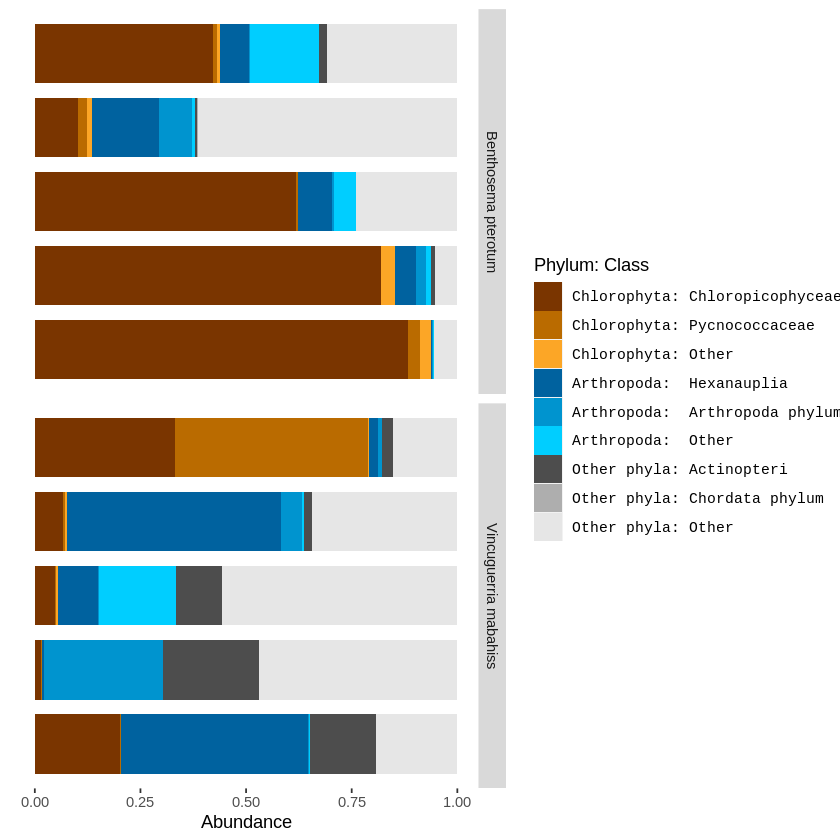

In [ ]:
hueRank <- "phylum"
hueRankPlural <- "phyla"
shadeRank <- "class"

# Sort phyloseq at lower, and then higher ranks
pseq2 <- physeq %>%
  tax_sort(by = sum, at = shadeRank) %>%
  tax_sort(by = sum, at = hueRank) %>%
  tax_agg(rank = shadeRank)

# Specify number of hues and shades desired
nHues <- 2 # "Other" phyla will be shades of grey
nShades <- 3 # "Other" families will be the lightest shade of each hue

hierarchicalPalInfo <- data.frame(
  hue = as.vector(tt_get(pseq2)[, hueRank]),
  shade = as.vector(tt_get(pseq2)[, shadeRank]),
  counts = taxa_sums(otu_get(pseq2))
)

hierarchicalPalInfo <- hierarchicalPalInfo %>%
  dplyr::mutate(
    hue = forcats::fct_other(
      f = hue, keep = unique(hue)[seq_len(nHues)],
      other_level = paste("Other", hueRankPlural)
    ),
    nChrHue = nchar(as.character(hue)), padHue = max(nChrHue) - nChrHue
  ) %>%
  dplyr::group_by(hue) %>%
  dplyr::mutate(
    shade = forcats::fct_other(
      f = shade, keep = unique(shade)[seq_len(nShades - 1)],
      other_level = "Other"
    )
  ) %>%
  dplyr::ungroup() %>%
  dplyr::mutate(
    nChrShade = nchar(as.character(shade)), padShade = max(nChrShade) - nChrShade,
    Taxa = paste0(hue, ": ", strrep(" ", padHue), shade, strrep(" ", padShade))
  )

hierarchicalPalMatrix <- matrix(
  data = sapply(
    X = seq(from = 30, to = 75, length.out = nShades),
    FUN = function(l) scales::hue_pal(l = l, h.start = 30)(n = nHues)
  ),
  byrow = TRUE, ncol = nHues
)
hierarchicalPalMatrix <- cbind(hierarchicalPalMatrix, grey.colors(n = nShades))

hierarchicalPal <- hierarchicalPalMatrix %>%
  as.vector() %>%
  setNames(unique(hierarchicalPalInfo$Taxa))

bar_chart_complex <- pseq2 %>%
  ps_get() %>%
  tax_mutate("Phylum: Class" = hierarchicalPalInfo$Taxa, .keep = "none") %>%
  comp_barplot(
    tax_level = "Phylum: Class", n_taxa = length(hierarchicalPal),
    tax_order = "asis", palette = hierarchicalPal, bar_width = 0.8,
    bar_outline_colour = NA
  ) +
  facet_grid(
    rows = vars(host_species), # Determine variable to split data on
    scales = "free", space = "free" # these options are important for faceting
  ) +
  coord_flip() +
  theme(legend.text = element_text(family = "mono")) + # for text alignment
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank())
bar_chart_complex
ggsave(file.path(plot_outdir, "bar_chart_complex.png"), plot = bar_chart_complex)

Annotated heatmap:

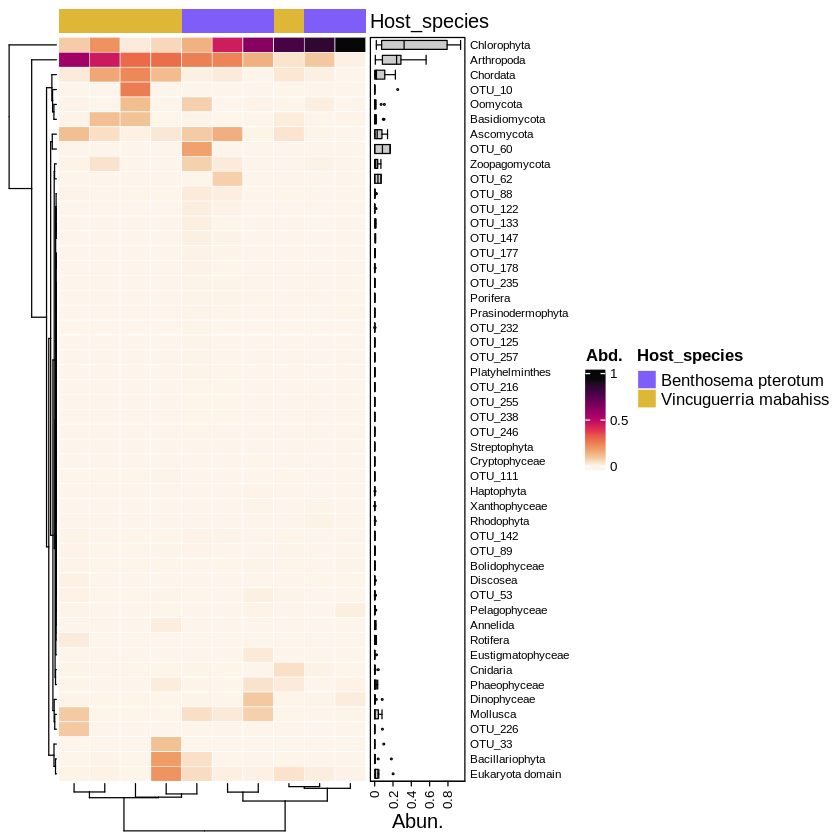

In [ ]:
set.seed(2) # Colours for Host_species are set randomly, so we set what random seed we want to use

heatmap_all <- physeq %>%
  tax_transform("compositional", rank = "phylum") %>% # Turn data into relative abundances
  comp_heatmap(
    tax_anno = taxAnnotation(
      Abun. = anno_tax_box(bar_width = 0.3, size = grid::unit(2, "cm")) # Add abundance boxplots on the side
    ),
    sample_anno = sampleAnnotation(
       Host_species = anno_sample("host_species") # Add host_species annotation
    )
  )
heatmap_all

Annotated heatmap of the 8 most abundant phyla:

Warning message:
“otu_table of counts is NOT available!
Available otu_table contains 311 values that are not non-negative integers”
Warning message:
“otu_table of counts is NOT available!
Available otu_table contains 311 values that are not non-negative integers”
Warning message:
“otu_table of counts is NOT available!
Available otu_table contains 311 values that are not non-negative integers”


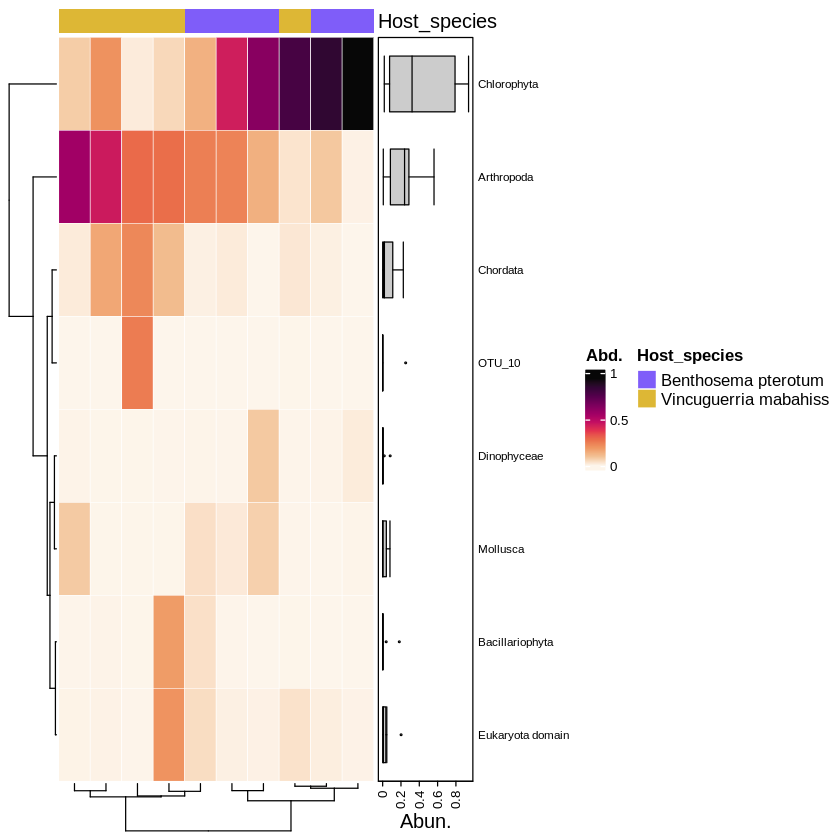

In [ ]:
set.seed(2) # Colours for Host_species are set randomly, so we set what random seed we want to use

heatmap_top8 <- physeq %>%
  tax_transform("compositional", rank = "phylum") %>% # Turn data into relative abundances
  comp_heatmap(
    taxa = tax_top(physeq, 8, by = max, rank = "phylum"),
    tax_anno = taxAnnotation(
      Abun. = anno_tax_box(bar_width = 0.3, size = grid::unit(2, "cm")) # Add abundance boxplots on the side
    ),
    sample_anno = sampleAnnotation(
       Host_species = anno_sample("host_species") # Add host_species annotation
    )
  )
heatmap_top8

Let's explore MDAs (PCA etc.). Note: we need to transform our data using for example the centred log-ratio (clr) transformation before we perform any statistics! This is **CRUCIAL**. Read why in [this](https://www.frontiersin.org/articles/10.3389/fmicb.2017.02224/full) paper. For the clr transformation to work, we need to replace 0s in our dataset, because it mathematically does not work on 0s. There are a couple of methods to do this, ranging from replacing 0s with a tiny tiny value to more elaborate applications of probability distributions to replace 0s. Phyloseq has a built-in function to replace 0s, but I personally prefer to use an R package that is specifically design for this job, zCompositions. We will now replace 0s in our OTU table. Conveniently, the clr transformation can easily be performed within phyloseq once 0s are replaced.

In [ ]:
OTU_nozeros <- otu_table(t(cmultRepl(t(otu_table(physeq)), method="CZM", z.warning=1, output="p-counts")), taxa_are_rows = TRUE)
otu_table(physeq) <- OTU_nozeros

No. adjusted imputations:  299 


Explore MDAs with this convenient, interactive function (note: unfortunately, this doesn't work in Google Colab, but you can use it in R Studio):

In [ ]:
ord_explore(physeq)

Warning message:
“otu_table of counts is NOT available!
Available otu_table contains 914 values that are not non-negative integers”
To stop the app: Click red stop button or hit Esc in the console

Loading required package: shiny


Listening on http://127.0.0.1:7683



One result that I gathered from the interactive function above:

Warning message:
“otu_table of counts is NOT available!
Available otu_table contains 543 values that are not non-negative integers”


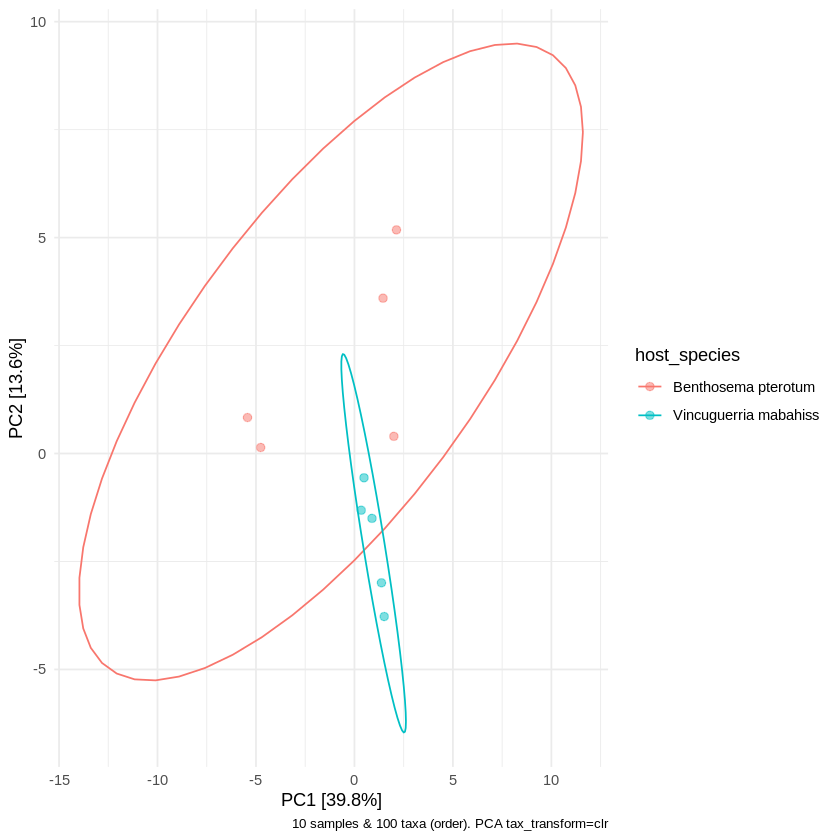

In [ ]:
physeq %>%
 tax_transform(rank = "order", trans = "clr") %>%
 ord_calc(
  method = "PCA"
 ) %>%
 ord_plot(
  axes = c(1, 2),
  colour = "host_species", fill = "host_species",
  shape = "circle", alpha = 0.5,
  size = 2
 ) +
 ggplot2::stat_ellipse(
  ggplot2::aes(colour = host_species)
 )